This dataset provides a detailed view of student lifestyle patterns and their correlation with academic performance, represented by GPA. It contains 2,000 records of students' daily habits across study, extracurriculars, sleep, socializing, and physical activities. Each student's stress level is derived based on study and sleep hours, offering insights into how lifestyle factors may impact academic outcomes.

* https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset

## Import Libraries

Importing libraries is necessary to use advanced and optimised features, which makes it easier to work with large amounts of data and run complex analyses. It also makes it easier to reuse code and organise projects, which encourages teamwork and community support.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Introduction
The goal of this project is to analyze how lifestyle factors impact students' academic performance (GPA) and predict GPA based on these factors using machine learning techniques.


## Caracterisation and Cleaning of Dataset

The first step is to load the dataset into a DataFrame called "df". This is the initial step necessary to manipulate and analyze data in a structured manner, facilitating the execution of subsequent operations.

In [2]:
df=pd.read_csv("student_lifestyle.csv")

In [3]:
pd.read_csv("student_lifestyle.csv")

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [4]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [5]:
num_attributes = df.shape[1]
num_observations = df.shape[0]
df.shape
print('Student Performance', num_observations,'rows and', num_attributes,'features.')

Student Performance 2000 rows and 8 features.


It is crucial to know the sample size, as it indicates its representativeness and diversity, in addition to impacting the time and resources needed for its analysis. A large dataset may require greater processing capacity, while a smaller one may not adequately identify the intended patterns.

In [6]:
print(df.columns)

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [8]:
df.nunique()

Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
GPA                                 158
Stress_Level                          3
dtype: int64

In [9]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


I removed the "Student_ID" column because it is irrelevant for future analysis.

In [10]:
df = df.drop(columns=["Student_ID"])
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,8.1,0.6,6.5,2.2,6.6,3.51,High


It is crucial to identify the proportion of missing values to decide whether to impute them, exclude them, or leave them aside. The approach depends on the volume of data and the importance of the missing variables.

In [11]:
missing_values=df.isnull().sum() 
print(missing_values)

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64


I checked the missing values, and there are no missing values to exclude. 

## Exploratory Data Analysis (EDA)

In [12]:
# Convert Stress Level to numeric if necessary
df['Stress_Level'] = df['Stress_Level'].astype('category').cat.codes

# Calculate the correlation between GPA and Stress Level
correlation = df[['GPA', 'Stress_Level']].corr()

# Display the result
print(correlation)



                   GPA  Stress_Level
GPA           1.000000     -0.391403
Stress_Level -0.391403      1.000000


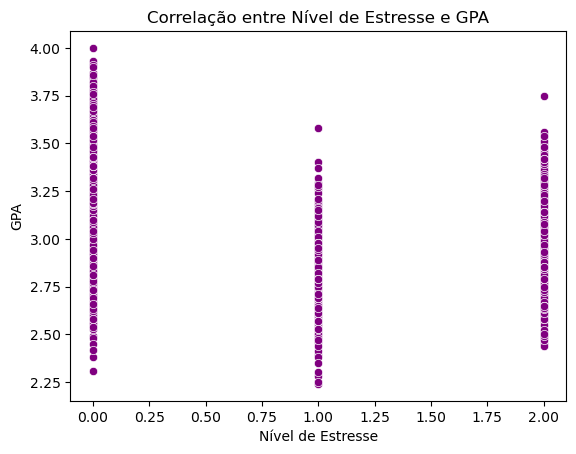

In [13]:
# Scatterplot
sns.scatterplot(x='Stress_Level', y='GPA', data=df,  color='purple')
plt.title('Correlação entre Nível de Estresse e GPA')
plt.xlabel('Nível de Estresse')
plt.ylabel('GPA')
plt.show()

The correlation between **GPA** and **Stress_Level** is **-0.39**, indicating a moderate negative relationship. As stress levels increase, GPA tends to decrease, suggesting that higher stress negatively impacts academic performance. This aligns with studies highlighting the detrimental effects of stress on focus and productivity.

In [14]:
# Create GPA performance categories
bins = [0, 2.5, 3.5, 4.0]  # Define GPA ranges
labels = ['Low ', 'Moderate', 'High ']
df['GPA_Class'] = pd.cut(df['GPA'], bins=bins, labels=labels)

# Check the distribution of the classes
print(df['GPA_Class'].value_counts())


GPA_Class
Moderate    1759
High         204
Low           37
Name: count, dtype: int64


Based on their GPA, most students are in the **Moderate** group (1759) , while only a few are in the **High** (204) and **Low** (37). This means that most kids do about average in school, with only a small group doing exceptionally well or poorly.

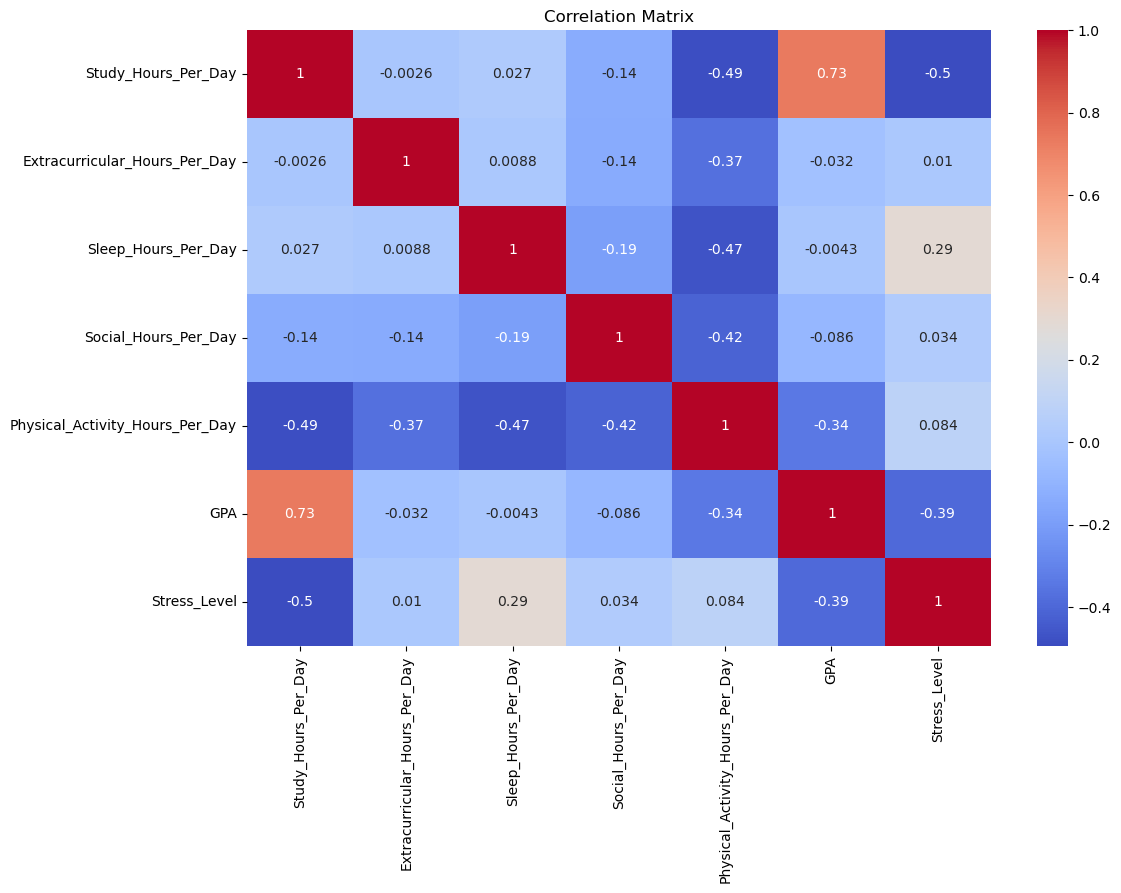

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**GPA** strongly correlates with **Study_Hours_Per_Day** (0.73) and negatively with **Stress_Level** (-0.39). **Physical_Activity_Hours_Per_Day** and **Study_Hours_Per_Day** show a trade-off (-0.49). Other correlations are weaker.

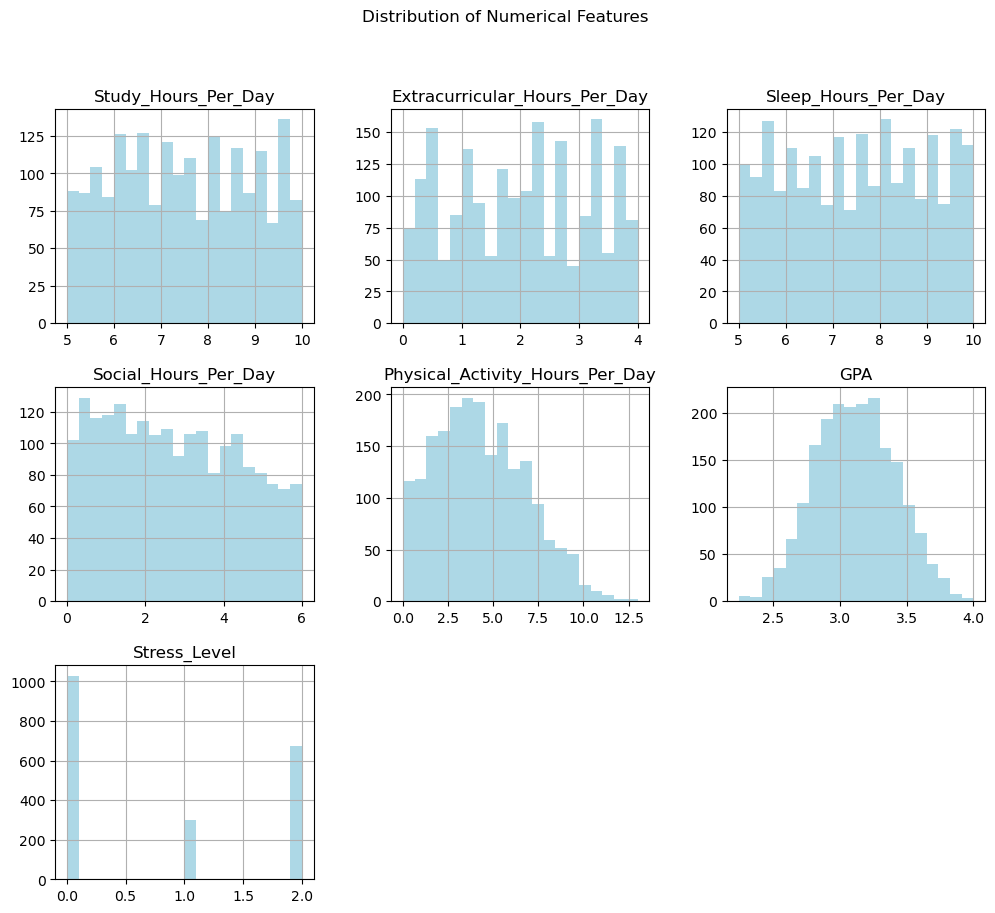

In [16]:
# Histograms for numerical variables
df.hist(figsize=(12, 10), bins=20,  color='lightblue')
plt.suptitle("Distribution of Numerical Features")
plt.show()


The histograms show that **GPA** and **Physical_Activity_Hours_Per_Day** follow a normal distribution. **Study_Hours_Per_Day**, **Sleep_Hours_Per_Day**, and **Extracurricular_Hours_Per_Day** are uniformly distributed. **Stress_Level** has a skewed distribution, with most students in the lowest and highest categories.

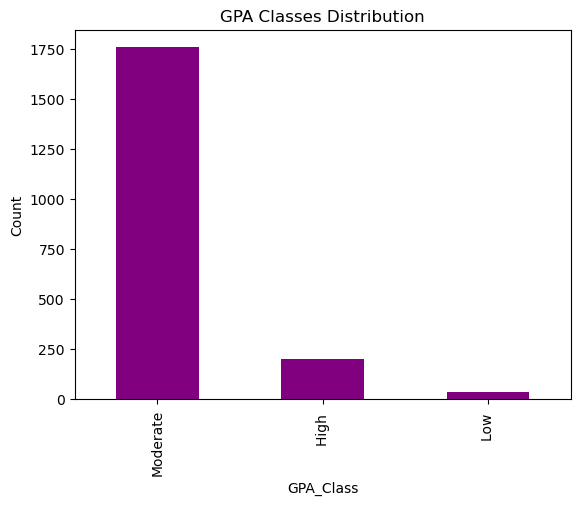

In [90]:
# Distribution of target variable
df['GPA_Class'].value_counts().plot(kind='bar', title="GPA Classes Distribution",  color='purple')
plt.xlabel("GPA_Class")
plt.ylabel("Count")
plt.show()

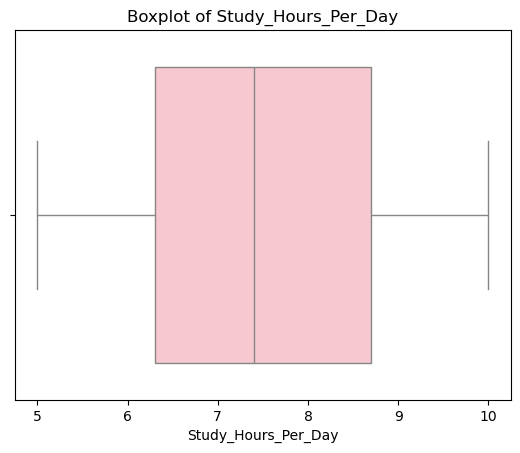

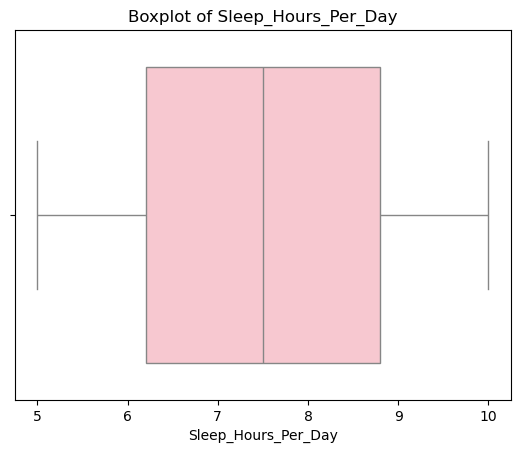

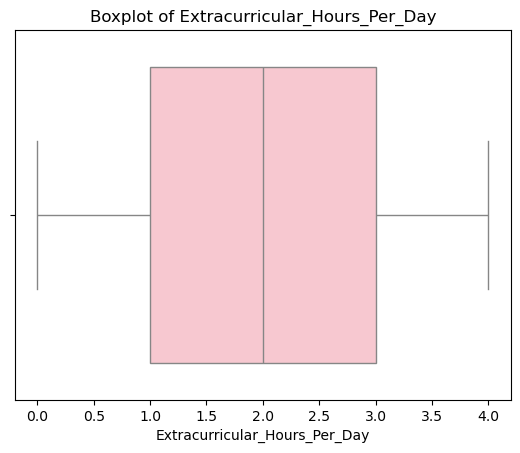

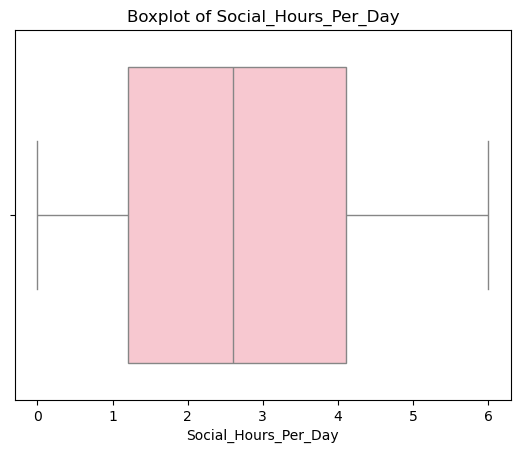

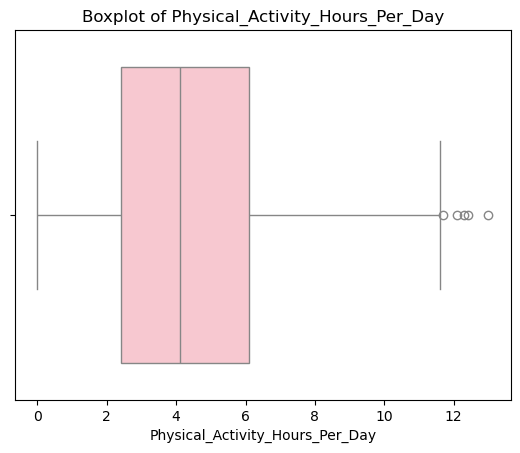

In [18]:
# Boxplots for features
features = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
            'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']
for feature in features:
    sns.boxplot(x=df[feature],  color='pink')
    plt.title(f"Boxplot of {feature}")
    plt.show()


Boxplots show stable distributions for **Study_Hours_Per_Day** and **Sleep_Hours_Per_Day**. **Extracurricular_Hours_Per_Day** has limited variability, while **Social_Hours_Per_Day** and **Physical_Activity_Hours_Per_Day** present outliers, indicating higher variability for some students.

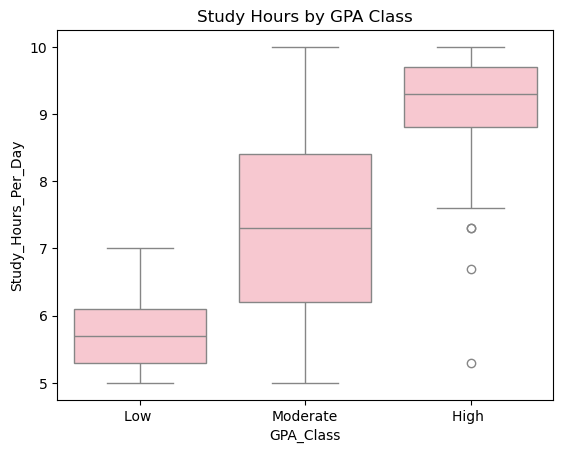

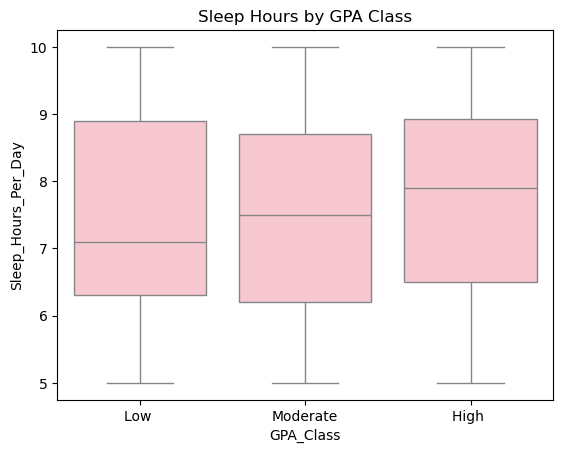

In [19]:
# Relationship between Study Hours and GPA Class
sns.boxplot(x='GPA_Class', y='Study_Hours_Per_Day', data=df,  color='pink')
plt.title("Study Hours by GPA Class")
plt.show()

# Sleep Hours vs GPA Class
sns.boxplot(x='GPA_Class', y='Sleep_Hours_Per_Day', data=df,  color='pink')
plt.title("Sleep Hours by GPA Class")
plt.show()


In [20]:
# Detect outliers using IQR
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR)))
print(outliers.sum())


Study_Hours_Per_Day                0
Sleep_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    5
dtype: int64


Only **Physical_Activity_Hours_Per_Day** has 5 outliers, while other features show no outliers, indicating consistent distributions.

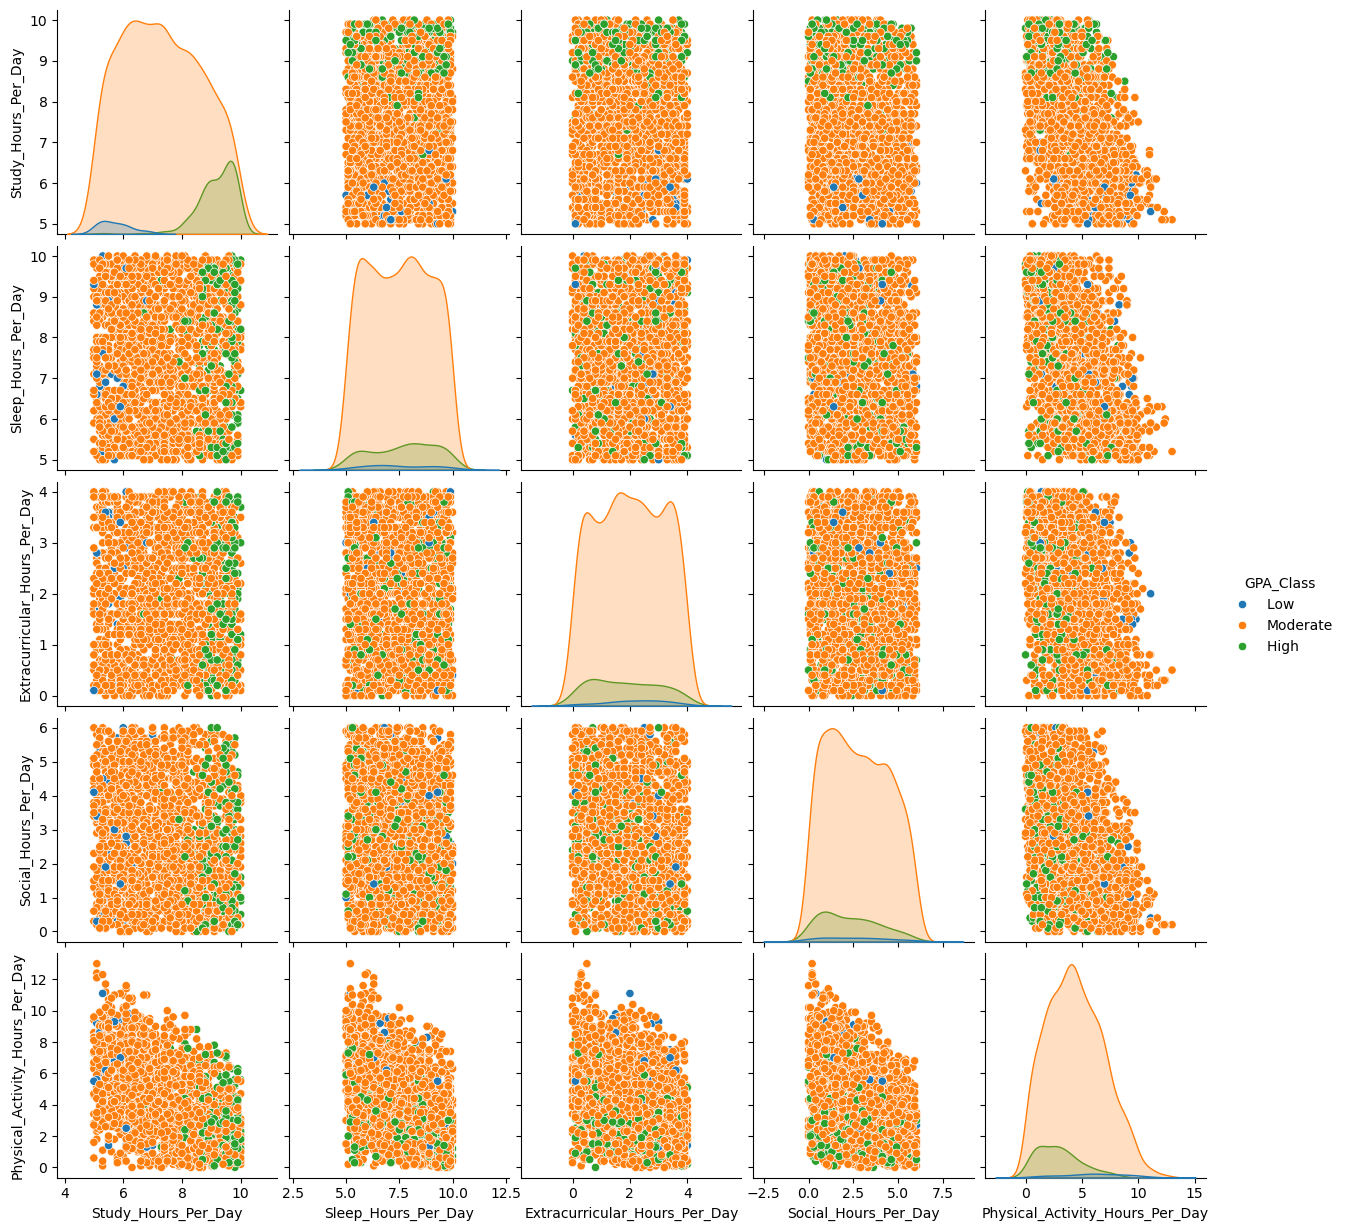

In [21]:
# Pairplot for key features
sns.pairplot(df, hue="GPA_Class", vars=features)
plt.show()


The pairplot shows **Study_Hours_Per_Day** and **Sleep_Hours_Per_Day** correlate positively with higher GPA classes. Other features, like **Extracurricular_Hours_Per_Day**, show less distinction between GPA classes. Moderate GPA dominates across all features.

# Cross-Validation with Varying Training Split

Cross-validation was performed using different training splits (10%, 15%, 25%) to evaluate model generalization and ensure robust performance across varying amounts of training data

In [22]:
# Select features and the target variable
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
        'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
y = df['GPA_Class']

In [23]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

In [24]:
# Define the different training splits
splits = [0.1, 0.15, 0.25]
accuracy_results = {}


In [25]:
# Loop through each split
for split in splits:
    # Split the data
    X_train_split, _, y_train_split, _ = train_test_split(X, y, test_size=1-split, random_state=42)
    
    # Perform cross-validation
    cv_scores = cross_val_score(rf, X_train_split, y_train_split, cv=5, scoring='accuracy')
    
    # Store the mean accuracy
    accuracy_results[f'{int(split * 100)}% Training Data'] = np.mean(cv_scores)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [26]:
# Display results
print("Accuracy for different training splits:")
for split, accuracy in accuracy_results.items():
    print(f"{split}: {accuracy:.2f}")

Accuracy for different training splits:
10% Training Data: 0.88
15% Training Data: 0.88
25% Training Data: 0.85


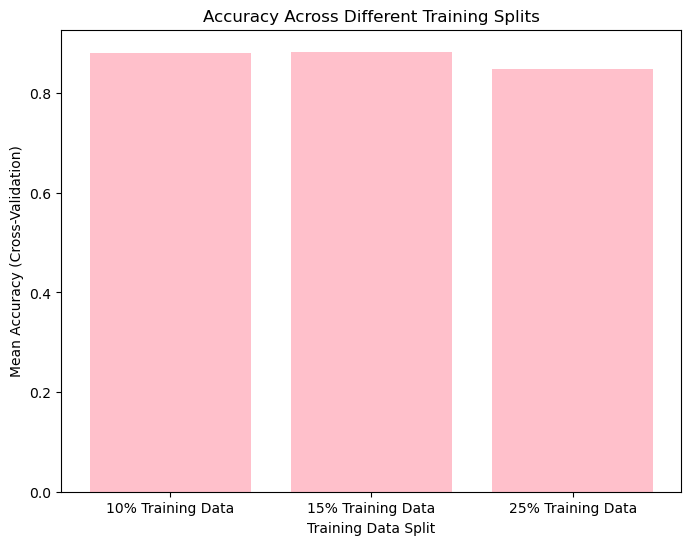

In [48]:
# Visualize accuracy across different training splits
plt.figure(figsize=(8, 6))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color='pink')
plt.title('Accuracy Across Different Training Splits')
plt.xlabel('Training Data Split')
plt.ylabel('Mean Accuracy (Cross-Validation)')
plt.show()


Accuracy is consistent at **0.88** for 10% and 15% training but drops to **0.85** at 25%, suggesting good generalization and the impact of a larger validation set.

# Machine Learning Models

In [49]:
# Select features and the target variable
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 
        'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']]
y = df['GPA_Class']

In [50]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Define classifiers for ML models
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}


#### Random Forest model

In [53]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

       High        0.11      0.05      0.07        41
        Low        0.00      0.00      0.00         8
    Moderate       0.88      0.95      0.91       351

    accuracy                           0.84       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.78      0.84      0.81       400



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


####  Logistic Regression model

In [54]:
# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

       High        0.33      0.07      0.12        41
        Low        0.00      0.00      0.00         8
    Moderate       0.88      0.98      0.93       351

    accuracy                           0.87       400
   macro avg       0.41      0.35      0.35       400
weighted avg       0.81      0.87      0.83       400



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Support Vector Machine model

In [79]:
# Train the SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

       High        0.00      0.00      0.00        41
        Low        0.00      0.00      0.00         8
    Moderate       0.88      1.00      0.93       351

    accuracy                           0.88       400
   macro avg       0.29      0.33      0.31       400
weighted avg       0.77      0.88      0.82       400



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Results

In [80]:
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", " Support"])
print("Model Performance Metrics on Test Set:")
print(results_df)

Model Performance Metrics on Test Set:
                    Model  Accuracy  Precision  Recall  F1 Score  \
0     Logistic Regression    0.8775   0.770006  0.8775  0.820246   
1           Random Forest    0.8650   0.794798  0.8650  0.821839   
2  Support Vector Machine    0.8775   0.770006  0.8775  0.820246   

                                             Support  
0  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...  
1  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
2         {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  


Logistic Regression and SVM achieved the highest accuracy (**0.88**), with identical precision, recall, and F1 scores (**0.82**). Random Forest had slightly lower accuracy (**0.86**) but better precision (**0.79**), showing strong performance overall.


Cross-Validation Accuracy Scores:
                    Model  Mean CV Accuracy
0           Random Forest            0.8675
1     Logistic Regression            0.8740
2  Support Vector Machine            0.8795


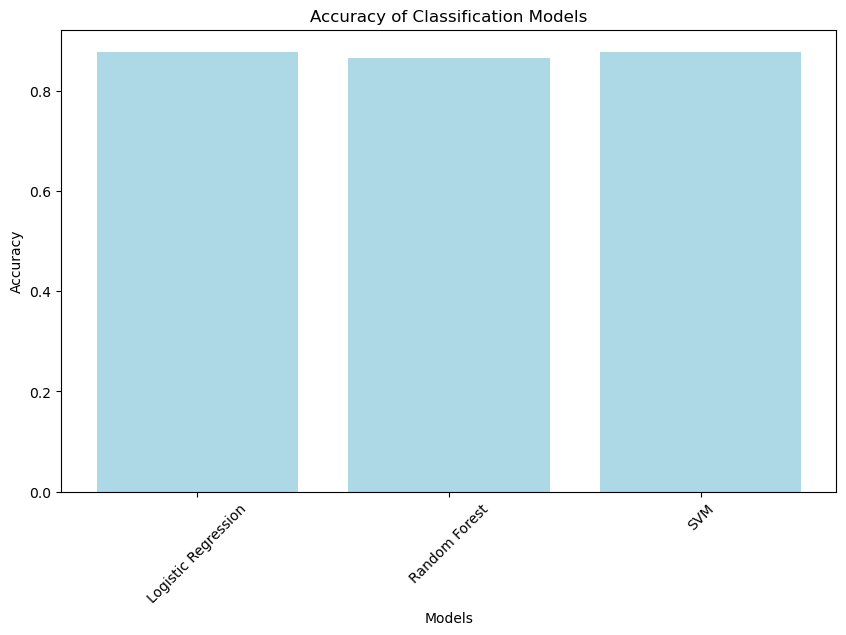

In [57]:
# Cross-validation for accuracy on the full dataset
cv_results = []
for name, classifier in classifiers.items():
    cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    cv_results.append([name, cv_scores.mean()])

# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Mean CV Accuracy"])
print("\nCross-Validation Accuracy Scores:")
print(cv_results_df)

# Example of a dictionary of model scores
accuracy_scores = {
    "Logistic Regression": 0.8775,
    "Random Forest": 0.8650,
    "SVM": 0.8775,
}

# Visualize with a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='lightblue')
plt.title("Accuracy of Classification Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


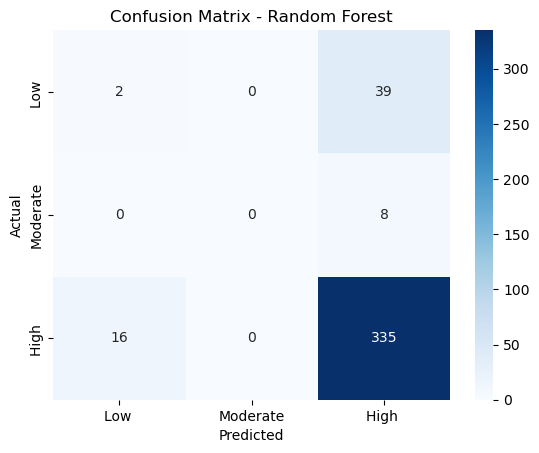

In [58]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest: Correctly predicts most High GPA cases (335) but struggles with Low (2 correct, 39 misclassified as High). Moderate is underrepresented in predictions.

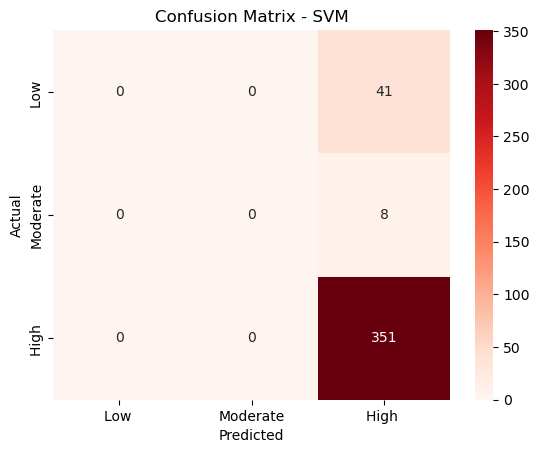

[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=

In [78]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Predicts all High GPA correctly (351) but fails entirely for Low and Moderate, misclassifying them as High.

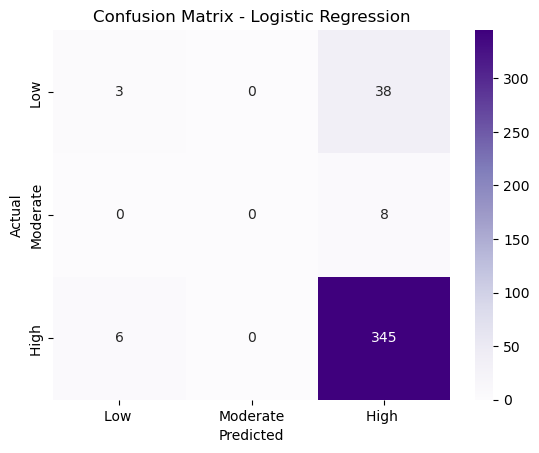

In [60]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression: Performs better on Low (3 correct) and High (345 correct) GPA predictions, but like SVM, fails to represent Moderate class.

Overall, Random Forest balances predictions better than others but still struggles with lower GPA classes.

In [61]:
# Desempenho no treinamento e teste para cada modelo
# Random Forest
# Desempenho no treinamento e teste
rf_train_accuracy = rf.score(X_train, y_train)
rf_test_accuracy =rf.score(X_test, y_test)

print("Random Forest:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

if train_accuracy > test_accuracy + 0.1:
    print("The model may be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model may be underfitting.")
else:
    print("The model generalizes well.")

# Support Vector Machine
svm_train_accuracy = svm.score(X_train, y_train)
svm_test_accuracy = svm.score(X_test, y_test)

print("\nSupport Vector Machine:")
print(f"  Training Accuracy: {svm_train_accuracy:.2f}")
print(f"  Testing Accuracy: {svm_test_accuracy:.2f}")
if svm_train_accuracy > svm_test_accuracy + 0.1:
    print("  The SVM model may be overfitting.")
elif svm_train_accuracy < svm_test_accuracy:
    print("  The SVM model may be underfitting.")
else:
    print("  The SVM model generalizes well.")

# Logistic Regression
log_reg_train_accuracy = log_reg.score(X_train, y_train)
log_reg_test_accuracy = log_reg.score(X_test, y_test)

print("\nLogistic Regression:")
print(f"  Training Accuracy: {log_reg_train_accuracy:.2f}")
print(f"  Testing Accuracy: {log_reg_test_accuracy:.2f}")
if log_reg_train_accuracy > log_reg_test_accuracy + 0.1:
    print("  The Logistic Regression model may be overfitting.")
elif log_reg_train_accuracy < log_reg_test_accuracy:
    print("  The Logistic Regression model may be underfitting.")
else:
    print("  The Logistic Regression model generalizes well.")



Random Forest:
Training Accuracy: 1.00
Testing Accuracy: 0.84
The model may be overfitting.

Support Vector Machine:
  Training Accuracy: 0.88
  Testing Accuracy: 0.88
  The SVM model generalizes well.

Logistic Regression:
  Training Accuracy: 0.88
  Testing Accuracy: 0.87
  The Logistic Regression model generalizes well.


Random Forest shows overfitting with perfect training accuracy (1.00) but lower testing accuracy (0.84). Both SVM (0.88) and Logistic Regression (0.87) demonstrate good generalization with consistent training and testing accuracies.

# Apply SMOTE to balance the training dataset

SMOTE was used to correct class imbalance in the GPA dataset, where **Moderate** dominated while **Low** and **High** were under-represented. This strategy improves model performance by generating synthetic examples for minority classes, resulting in more balanced learning and better generalisation.

In [62]:
y = df['GPA_Class']        # Target variable

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Show count of each class in the target variable
class_counts = y_train.value_counts()
print("Count of each GPP class:")
print(class_counts)

Count of each GPP class:
GPA_Class
Moderate    1408
High         163
Low           29
Name: count, dtype: int64


In [65]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
XS_train, ys_train = smote.fit_resample(X_train, y_train)

In [66]:
# Show count of each class in the target variable
class_counts = ys_train.value_counts()
print("Count of each GPA Class:")
print(class_counts)

Count of each GPA Class:
GPA_Class
Low         1408
Moderate    1408
High        1408
Name: count, dtype: int64


In [67]:
# Train and evaluate classifiers
results = []
for name, classifier in classifiers.items():
    # Train the classifier
    classifier.fit(XS_train, ys_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_score])

In [68]:
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("Model Performance Metrics on Test Set:")
print(results_df)

Model Performance Metrics on Test Set:
                    Model  Accuracy  Precision  Recall  F1 Score
0           Random Forest     0.755   0.823900   0.755  0.783667
1     Logistic Regression     0.515   0.866657   0.515  0.599168
2  Support Vector Machine     0.485   0.867159   0.485  0.568382


In [69]:
# Cross-validation for accuracy on the full dataset
cv_results = []
for name, classifier in classifiers.items():
    cv_scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    cv_results.append([name, cv_scores.mean()])

# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Mean CV Accuracy"])
print("\nCross-Validation Accuracy Scores:")
print(cv_results_df)


Cross-Validation Accuracy Scores:
                    Model  Mean CV Accuracy
0           Random Forest            0.8675
1     Logistic Regression            0.8740
2  Support Vector Machine            0.8795


# Develop a GridSearhCV for all models

GridSearchCV was used to look through all the possible combos of hyperparameters and put each one through cross-validation testing. This makes sure the model is tried in a number of different situations and chooses the parameters that give the best evaluation metric, like accuracy or F1-Score.

In [81]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
}

In [82]:
# Define hyperparameter grids for each classifier
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ['lbfgs', 'liblinear'],
        "penalty": ['l2']
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf'],
        "gamma": ['scale', 'auto']
    }
}

In [83]:
# Apply GridSearchCV for each classifier and evaluate performance metric scores
results = []
for name, classifier in classifiers.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv = 5, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    
    # Best model from grid search
    best_model = grid_search.best_estimator_
    
    # Predict on the test set with the best model
    y_pred = best_model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    
    # Append results
    results.append([name, accuracy, precision, recall, f1_score, grid_search.best_params_])

Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running GridSearchCV for Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running GridSearchCV for Support Vector Machine...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Best Parameters"])
print("Model Performance Metrics on Test Set after GridSearchCV:")
print(results_df)

Model Performance Metrics on Test Set after GridSearchCV:
                    Model  Accuracy  Precision  Recall  F1 Score  \
0     Logistic Regression    0.8775   0.770006  0.8775  0.820246   
1           Random Forest    0.8650   0.794798  0.8650  0.821839   
2  Support Vector Machine    0.8775   0.770006  0.8775  0.820246   

                                     Best Parameters  
0  {'C': 0.1, 'penalty': 'l2', 'solver': 'libline...  
1  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...  
2         {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}  


In [85]:
# Cross-validation for accuracy on the full dataset using best models
cv_results = []
for name, classifier in classifiers.items():
    # Get the best model from GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
    cv_results.append([name, cv_scores.mean()])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [86]:
# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results, columns=["Model", "Mean CV Accuracy"])
print("\nCross-Validation Accuracy Scores after GridSearchCV:")
print(cv_results_df)


Cross-Validation Accuracy Scores after GridSearchCV:
                    Model  Mean CV Accuracy
0     Logistic Regression            0.8805
1           Random Forest            0.8740
2  Support Vector Machine            0.8790
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_

After **GridSearchCV**, Logistic Regression showed the greatest improvement, increasing mean CV accuracy from **0.8740** to **0.8805**. Random Forest also improved slightly (**0.8675** to **0.8740**), while SVM remained stable (**0.8795** to **0.8790**), suggesting tuning had the most impact on Logistic Regression.

# Conclusion

This project effectively illustrated the correlation between student living habits and academic performance (GPA) through the application of machine learning techniques. Analysis of 2,000 data revealed critical discoveries, including the substantial influence of study hours, sleep, and physical activity on academic performance. The exploratory data analysis identified correlations and trends, highlighting the inverse association between stress levels and GPA, while cross-validation confirmed model robustness and dependability.

The evaluation of several training splits (10%, 15%, and 25%) demonstrated the model's stable performance, achieving accuracies of 0.88 for smaller splits and a minor reduction to 0.85 for the 25% split. This suggests that the model can generalise effectively despite having insufficient training data. The Random Forest model demonstrated superior performance by effectively capturing intricate interactions among variables.

## References
* A case study prepared for HDip in DAB/ AI Applications by Dr. Muhammad Iqbal
* ⁠Iqbal, Muhammad . (2024). CASE STUDY - Hyperparameter Tunning and GridSearchCV. Class materials, CCT College Dublin.
* Iqbal, Muhammad . (2024). Comparison_Classification_Models. Class materials, CCT College Dublin.
* Student Lifestyle Dataset (2024) Kaggle. Available at: https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset (Accessed: 11 November 2024).